## Data Description:

The data contains features extracted from the silhouette of vehicles in different angles. 
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, 
Saab 9000 and an Opel Manta 400 cars. 
This particular combination of vehicles was chosen with the expectation that the bus, 
van and either one of the cars would be readily distinguishable,
but it would be more difficult to distinguish between the cars.

## Objective:
Apply dimensionality reduction technique – 
PCA and train a model using principle components instead of training the model using just the raw data.

## Importing standard libraries

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

C:\Users\Velumani\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading data

In [9]:
cData=pd.read_csv('vehicle-1.csv')
cData.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

## Data pre-processing

## Names of the variables and shape of the data set.

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder() 
columns = cData.columns
#Let's Label Encode our class variable: 
print(columns)
cData['class'] = le.fit_transform(cData['class'])
cData.shape

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


(846, 19)

## Performing EDA

## Quick check to identify the presence of outliers in the dataset.

In [11]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

On performing the check it is found that

    Circularity,class,hollow_ratio,max.length_rectangularity,max.length_aspect_ratio,compactness has no missing values rest all features are having some kind of missing values.
    All attributes are of numerical type.

## Presence of Missing Values.

In [12]:
from sklearn.impute import SimpleImputer

newdf = cData.copy()

X = newdf.iloc[:,0:19] #separting all numercial independent attribute

imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column )
newdf.describe()

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.918440     195.632388    0.977541  
std            6.152247       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

In [13]:
print("Original null value count:", cData.isnull().sum())
print("\n\nCount after we imputed the NaN value: ", newdf.isnull().sum())

Original null value count: compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


Count after we imputed the NaN value:  compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity      

## Insights:

    If you carefully observe above, our original dataframe cData and new dataframe newdf , 
    we will find that after we imputed the dataframe series using simple imputer, 
    we can see that the missing NaN values from our orginal datframe columns are treated and replaced using median strategy.

## Understanding the attributes.

## Descriptive statistical summary

In [14]:
newdf.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

In [15]:
newdf.shape

(846, 19)

In [16]:
plt.style.use('seaborn-whitegrid')

newdf.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

## Insights :
    Most of the data attributes seems to be normally distributed
    Scaled variance 1 and skewness about 1 and 2, scatter_ratio, seems to be right skewed .
    Pr.axis_rectangularity seems to have outliers as there are some gaps found in the bar plot.

## Analyze the distribution of the columns and see the skewness in attributes.

In [17]:
#We use the seaborn distplot to analyze the distribution of the columns and see the skewness in attributes.

f, ax = plt.subplots(1, 6, figsize=(30,5))
vis1 = sns.distplot(newdf["scaled_variance.1"],bins=10, ax= ax[0])
vis2 = sns.distplot(newdf["scaled_variance"],bins=10, ax=ax[1])
vis3 = sns.distplot(newdf["skewness_about.1"],bins=10, ax= ax[2])
vis4 = sns.distplot(newdf["skewness_about"],bins=10, ax=ax[3])
vis6 = sns.distplot(newdf["scatter_ratio"],bins=10, ax=ax[5])

f.savefig('subplot.png')

In [18]:
skewValue = newdf.skew()
print("skewValue of dataframe attributes: ", skewValue)

skewValue of dataframe attributes:  compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64


## Univariate Analysis Using Boxplot

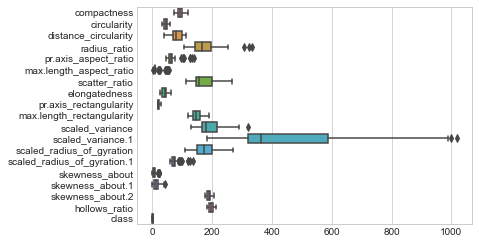

In [19]:
#Summary View of all attributes
ax = sns.boxplot(data=newdf, orient="h")

In [20]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['pr.axis_aspect_ratio'], color='red')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.skewness_about, color='blue')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.scaled_variance, color='green')

plt.show()

In [21]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['radius_ratio'], color='red')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= newdf['scaled_variance.1'], color='yellow')

plt.show()

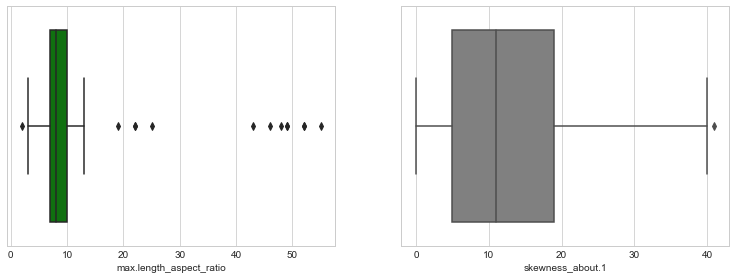

In [22]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['max.length_aspect_ratio'], color='green')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['skewness_about.1'], color='grey')


plt.show()

## Insights:

    Pr.axis_aspect_ratio, skewness_about, max_length_aspect_ratio, skewness_about_1,
    Scaled_radius_of_gyration.1, scaled_variance.1, radius_ratio, skewness_about, scaled_variance.1 are 
    some of the attributes with outliers which is visible with all dotted points

## Dealing with outliers

In [23]:
from scipy.stats import iqr

Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [24]:
cleandf = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape

(813, 19)

## Plotting the Boxplot once again to check the presence of outliers

In [25]:
plt.figure(figsize= (20,15))
plt.subplot(8,8,1)
sns.boxplot(x= cleandf['pr.axis_aspect_ratio'], color='orange')

plt.subplot(8,8,2)
sns.boxplot(x= cleandf.skewness_about, color='purple')

plt.subplot(8,8,3)
sns.boxplot(x= cleandf.scaled_variance, color='brown')
plt.subplot(8,8,4)
sns.boxplot(x= cleandf['radius_ratio'], color='red')

plt.subplot(8,8,5)
sns.boxplot(x= cleandf['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(8,8,6)
sns.boxplot(x= cleandf['scaled_variance.1'], color='yellow')

plt.subplot(8,8,7)
sns.boxplot(x= cleandf['max.length_aspect_ratio'], color='lightblue')

plt.subplot(8,8,8)
sns.boxplot(x= cleandf['skewness_about.1'], color='pink')

plt.show()

## Insights:

    We can see that all the boxplots for the attributes which had outlier have been treated and removed. 
    Since no. of outliers were less we opted to remove it. 
    Generally we avoid this as it can lead to info loss in case of large data sets with large no of outliers

## Data Correlation among the variables

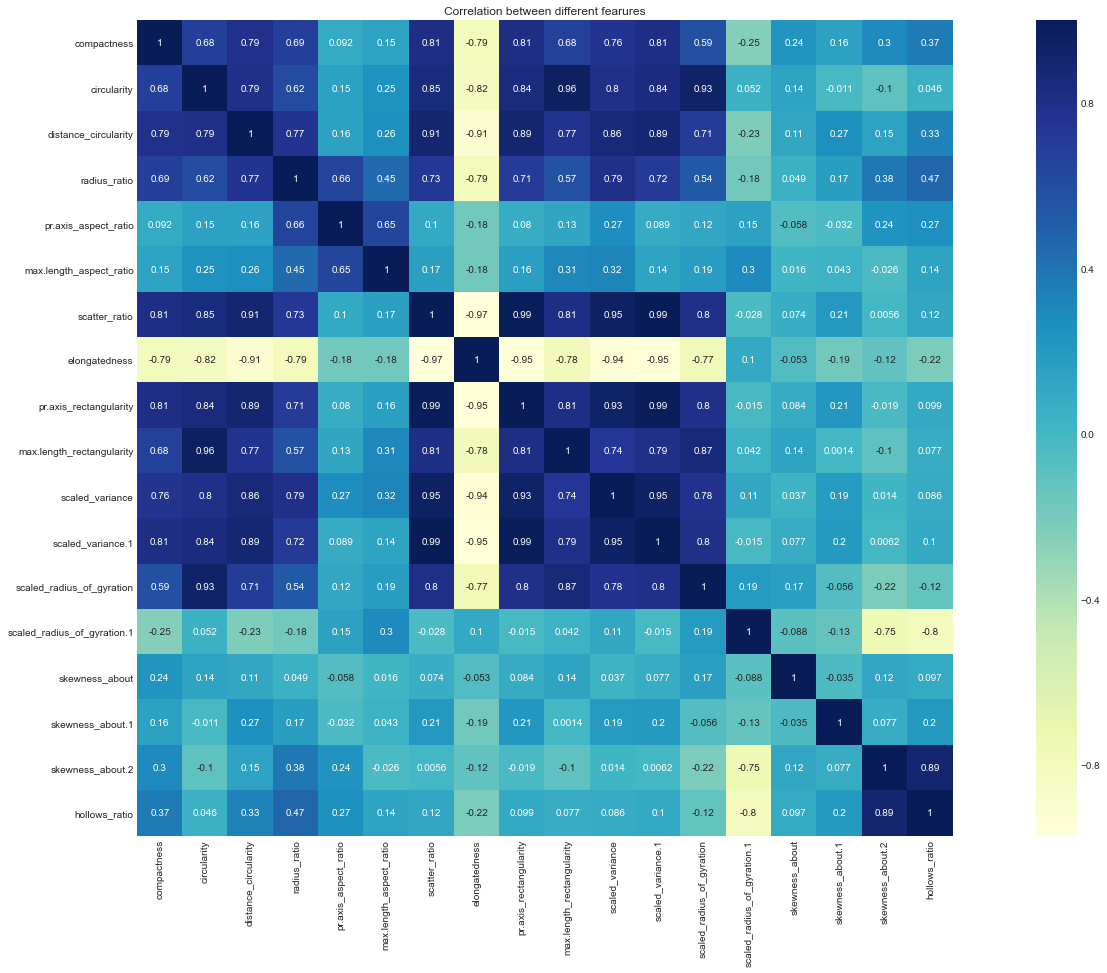

In [26]:
def correlation_heatmap(dataframe,l,w):
    
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='YlGnBu')
    plt.title('Correlation between different fearures')
    plt.show();
    
# Let's Drop Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA as PCA should only be performed on independent attribute
cleandf= newdf.drop('class', axis=1)

#print("After Dropping: ", cleandf)
correlation_heatmap(cleandf, 30,15)

## Insights:

    Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98.

    Skewness_about_2 and hollow_ratio seems to be strongly correlated with value of: 0.89.

    Distance_circularity and radius_ratio seems to have high positive correlation with value of 0.81.

    Compactness & circularity,radius_ratio & pr.axis_aspect_ratio also seems to be 
    averagely correlated with value of 0.67.

    Scaled _variance & scaled_radius_of_gyration, circularity & distance_circularity also seems to 
    be highly correlated with value of 0.79.

    Pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with value of 0.81.

    Scatter_ratio and elongatedness seems to be have strong negative correlation val with value of 0.97.

    Elongatedness and pr.axis_rectangularity seems to have strong negative correlation with value of 0.95.


    Max_length_aspect_ratio & radius_ratio have average correlation with coeff: 0.5.

    Pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation.

    Scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated.

    Scaled_radius_gyration.1 & skewness_about seems to be very little correlated.

    Skewness_about & skewness_about.1 not be correlated.

    Skewness_about.1 and skewness_about.2 are not correlated.

## Pair Plot to represent the correlation.

In [27]:
sns.pairplot(cleandf, diag_kind="kde")

## Insights:

    From above correlation matrix we can see that there are many features which are highly correlated. 
    If we carefully analyse, we will find that many features having more than 0.9 correlation. 
    So we can get rid of those columns whose correlation is +-0.9 or above.
    There are 8 such columns:

    Max.length_rectangularity
    Scaled_radius_of_gyration
    Skewness_about.2
    Scatter_ratio
    Elongatedness
    Pr.axis_rectangularity
    Scaled_variance
    Scaled_variance.1

## Train a Support vector machine using the train set and get the accuracy on the test set.

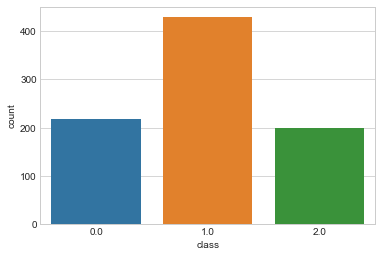

In [28]:
#display how many are car,bus,van. 
newdf['class'].value_counts()

splitscaledf = newdf.copy()
sns.countplot(newdf['class'])
plt.show()

In [29]:
splitscaledf.head(850)

compactness  circularity  distance_circularity  radius_ratio  \
0           95.0         48.0                  83.0         178.0   
1           91.0         41.0                  84.0         141.0   
2          104.0         50.0                 106.0         209.0   
3           93.0         41.0                  82.0         159.0   
4           85.0         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841         93.0         39.0                  87.0         183.0   
842         89.0         46.0                  84.0         163.0   
843        106.0         54.0                 101.0         222.0   
844         86.0         36.0                  78.0         146.0   
845         85.0         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                     10.0          162.0   
1                    57.0                      9.0          149.0   
2                    66.0                     10.0          207.0   
3                    63.0                      9.0          144.0   
4                   103.0                     52.0          149.0   
..                    ...                      ...            ...   
841                  64.0                      8.0          169.0   
842                  66.0                     11.0          159.0   
843                  67.0                     12.0          222.0   
844                  58.0                      7.0          135.0   
845                  55.0                      5.0          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                      159.0   
1             45.0                    19.0                      143.0   
2             32.0                    23.0                      158.0   
3             46.0                    19.0                      143.0   
4             45.0                    19.0                      144.0   
..             ...                     ...                        ...   
841           40.0                    20.0                      134.0   
842           43.0                    20.0                      159.0   
843           30.0                    25.0                      173.0   
844           50.0                    18.0                      124.0   
845           56.0                    17.0                      128.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [30]:
splitscale_X = splitscaledf.iloc[:,0:18].values
splitscale_y = splitscaledf.iloc[:,18].values

print("Indpendent Variable X",splitscale_X )
print("Class Variable y",splitscale_y )

Indpendent Variable X [[ 95.  48.  83. ...  16. 187. 197.]
 [ 91.  41.  84. ...  14. 189. 199.]
 [104.  50. 106. ...   9. 188. 196.]
 ...
 [106.  54. 101. ...   4. 187. 201.]
 [ 86.  36.  78. ...  25. 190. 195.]
 [ 85.  36.  66. ...  18. 186. 190.]]
Class Variable y [2. 2. 1. 2. 0. 0. 0. 2. 2. 1. 2. 1. 0. 2. 0. 1. 2. 0. 1. 1. 0. 2. 0. 0.
 1. 2. 1. 1. 0. 1. 2. 1. 1. 1. 1. 2. 0. 2. 1. 0. 1. 2. 2. 1. 1. 2. 2. 0.
 2. 1. 1. 1. 1. 0. 0. 2. 1. 2. 1. 2. 1. 1. 2. 0. 0. 1. 0. 1. 2. 0. 1. 1.
 1. 1. 2. 1. 1. 1. 0. 0. 0. 0. 2. 1. 0. 0. 2. 2. 0. 1. 1. 1. 1. 2. 0. 1.
 1. 0. 1. 0. 0. 2. 2. 2. 0. 1. 1. 1. 0. 0. 2. 2. 1. 1. 2. 2. 1. 1. 0. 0.
 1. 2. 2. 1. 2. 2. 0. 0. 2. 0. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 0. 1. 0.
 1. 1. 2. 0. 1. 2. 1. 0. 1. 1. 2. 0. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 2. 1. 0. 2. 0. 2. 0. 1. 0. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 2.
 1. 0. 1. 0. 1. 0. 0. 0. 2. 1. 1. 1. 2. 2. 1. 0. 0. 1. 1. 2. 0. 0. 1. 1.
 1. 1. 0. 2. 1. 2. 0. 0. 1. 2. 1. 2. 1. 1. 2. 1. 0. 1. 2. 2. 0. 0. 1. 0.
 1.

## Splitting the data in train and test sets into 70:30 Ratio

In [31]:
#splitting the data in train and test sets into 70:30 Ratio

SplitScale_X_train, SplitScale_X_test, SplitScale_y_train, SplitScale_y_test = train_test_split(splitscale_X,splitscale_y, test_size = 0.3, random_state = 10)

## Using StandardScaler to normalize the data set

In [32]:
from sklearn.preprocessing import StandardScaler
# We transform (centralize) the entire X (independent variable data) to normalize it using standardscalar through transformation. 
# We will create the PCA dimensions on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)   

In [33]:
ssx_train_sd = StandardScaler().fit_transform(SplitScale_X_train)
ssx_test_sd = StandardScaler().fit_transform(SplitScale_X_test)

print(len(ssx_train_sd))
print(len(ssx_test_sd))

592
254


## Calculating 18*18 covariance matrix

In [34]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix_1 = np.cov(ssx_train_sd.T) # the relevant covariance matrix
print('Covariance Matrix \n%s', (cov_matrix_1))

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix_1)
print('Eigenvectors \n%s' %(e_vecs))
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00169205  0.69510999  0.79093174  0.68430087  0.10533174  0.13879193
   0.81466568 -0.79249053  0.81562662  0.69493762  0.75883574  0.81360243
   0.6018784  -0.23802643  0.21659465  0.16129088  0.29107259  0.36229106]
 [ 0.69510999  1.00169205  0.80101871  0.63753441  0.17332159  0.23038915
   0.85124238 -0.82911962  0.84353731  0.96223666  0.79821698  0.8377724
   0.92490531  0.04164937  0.12317003  0.0144264  -0.08843129  0.06521593]
 [ 0.79093174  0.80101871  1.00169205  0.76084958  0.1703543   0.25346094
   0.90364003 -0.91115044  0.89344273  0.79364077  0.85618354  0.88392536
   0.72188889 -0.20587281  0.09535999  0.26881961  0.13214005  0.3236881 ]
 [ 0.68430087  0.63753441  0.76084958  1.00169205  0.68494799  0.47133546
   0.72992301 -0.78442329  0.7057782   0.60117669  0.79595443  0.7127739
   0.55325762 -0.13680084  0.02938361  0.17620666  0.36656842  0.46385678]
 [ 0.10533174  0.17332159  0.1703543   0.68494799  1.00169205  0.6847859
   0.10994971 -

In [35]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_1)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.2750839   0.12784374  0.1159604  -0.0736998  -0.08298631  0.16619902
   0.45405819  0.57945595  0.45440883 -0.28074428  0.00669863  0.00114313
  -0.14760701 -0.01457711 -0.03256055 -0.00732469  0.06280839 -0.0157956 ]
 [ 0.29404423 -0.10880657  0.03079054 -0.18229829  0.08792926 -0.3373792
  -0.23559572  0.18743624  0.01850061  0.10009676  0.01430145 -0.25384239
  -0.0429882  -0.00962968  0.59042417  0.07967834  0.27177991  0.38674013]
 [ 0.30389322  0.06858713  0.05482235  0.07330541 -0.04192866 -0.14120194
   0.10595199 -0.42917571  0.15267079 -0.29970476  0.67874648  0.00159816
   0.22008418  0.01367399 -0.10866774 -0.02798734  0.02168137  0.20478086]
 [ 0.26773956  0.18302728 -0.2798132   0.03342543  0.04092307  0.24027635
  -0.20548136 -0.10129102  0.22894938 -0.05111382 -0.11218906 -0.15970214
   0.08246966 -0.05723396  0.31649807 -0.08456967 -0.70003175 -0.05429457]
 [ 0.08583396  0.12126425 -0.62930797 -0.04493283  0.04342769  0.19801449
  -0.40626343  0.

In [36]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.43334996713521, array([ 0.2750839 ,  0.29404423,  0.30389322,  0.26773956,  0.08583396,
        0.0933491 ,  0.31612462, -0.3135544 ,  0.31293035,  0.28687477,
        0.30790904,  0.31257102,  0.27469536, -0.01603323,  0.03417219,
        0.0619144 ,  0.02726816,  0.0728572 ])), (2.947620530164082, array([ 0.12784374, -0.10880657,  0.06858713,  0.18302728,  0.12126425,
       -0.00708186, -0.05144541, -0.01131229, -0.06074579, -0.09673598,
       -0.07070184, -0.05728709, -0.1973884 , -0.48926852,  0.04813198,
        0.09854366,  0.55027547,  0.54916227])), (1.9849600713857132, array([ 0.1159604 ,  0.03079054,  0.05482235, -0.2798132 , -0.62930797,
       -0.59378358,  0.10213005, -0.06594628,  0.11316678,  0.01598457,
       -0.06707433,  0.11264615,  0.04074117, -0.30552013,  0.10743659,
        0.04637073, -0.00814786, -0.04364967])), (1.161100268146992, array([-0.0736998 , -0.18229829,  0.07330541,  0.03342543, -0.04493283,
       -0.0272523 ,  0.08913545, -0.0777063 ,  0.088

In [38]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

## Visualizing the Principal Component Vs Explained Variance Ratio

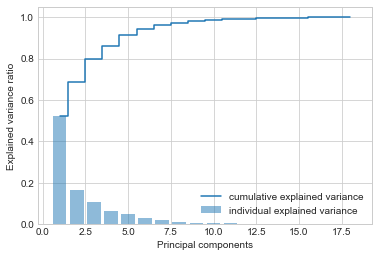

In [39]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

## Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data.

In [40]:
# P_reduce represents reduced mathematical space....

P_reduce_1 = np.array(eigvectors_sorted[0:8])   

X_train_std_pca = np.dot(ssx_train_sd,P_reduce_1.T)   

X_test_std_pca = np.dot(ssx_test_sd,P_reduce_1.T) 
 

print(X_train_std_pca)
print(X_test_std_pca)

Projected_df_train = pd.DataFrame(X_train_std_pca)
Projected_df_test = pd.DataFrame(X_test_std_pca)

[[ 0.4191082   1.29819165 -0.03603868 ... -0.37292628 -0.69560243
  -0.4682304 ]
 [ 4.4886136  -0.21234722 -0.02129682 ... -0.76522485 -0.07854894
   0.6212278 ]
 [-0.01738866 -0.75026605 -0.52294698 ... -1.64705074 -0.3871865
   0.28143852]
 ...
 [ 3.17186219  1.21640068  1.06700555 ... -0.14022228  0.87501955
  -0.04385971]
 [-0.63698061 -0.8633004  -0.03047072 ... -0.62603988 -0.14701251
  -0.41445471]
 [-2.12575633 -2.19012973  0.31186768 ... -0.85714099 -0.61691178
  -0.16807742]]
[[ 1.59636474  2.68428236  0.08042758 ... -1.11583358  0.19839214
   0.48203914]
 [ 1.70692118  1.18450742  0.09303721 ... -0.17370898 -0.13938664
  -0.34771331]
 [ 4.83117319 -1.21397338  0.59641526 ... -1.83808509  1.0500038
  -0.2585123 ]
 ...
 [-1.92043557  2.81138739 -0.31587474 ... -0.84450221 -0.36707781
   0.56306065]
 [ 4.44227223 -0.37434085  0.48694833 ... -0.39947645  0.18431661
   0.51055201]
 [ 1.38060281  1.13882426 -0.06019046 ...  0.51471241  0.48068339
  -0.87891865]]


## Pairplot Analysis On Training PCA Data Set.

In [41]:
sns.pairplot(Projected_df_train, diag_kind='kde')

## Pairplot Analysis On Test PCA Data Set.

In [42]:
sns.pairplot(Projected_df_test, diag_kind='kde')

## Insights:

    We can see that after we performed PCA our new dataframe with reduced dimesnions having no to zero linear relationship 
    among themseleves, which is the main objective of using PCA tool.
    Almost all attribures have cloud of data in the mathematical space with no clear positive or negative correlation.

In [44]:
ssx_train_sd.shape, P_reduce_1.T.shape, X_train_std_pca.shape, X_test_std_pca.shape

((592, 18), (18, 8), (592, 8), (254, 8))

In [45]:
clf1 = SVC()
clf1.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', clf1.score(ssx_test_sd, SplitScale_y_test))

clf2 = SVC()
clf2.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', clf2.score(X_test_std_pca, SplitScale_y_test))

#predict the y value
pca_yhat_predict= clf2.predict(X_test_std_pca)

#orginal data y value
orig_yhat_predict = clf1.predict(ssx_test_sd)

print("Before PCA On Original 18 Dimension",accuracy_score(SplitScale_y_test,orig_yhat_predict))
print("After PCA(On 8 dimension)",accuracy_score(SplitScale_y_test,pca_yhat_predict))

Before PCA score 0.9566929133858267
After PCA score 0.952755905511811
Before PCA On Original 18 Dimension 0.9566929133858267
After PCA(On 8 dimension) 0.952755905511811


## Confusion Matrix to visualize the findings.

Confusion Matrix For : 
 Original Data Set [[ 68   1   2]
 [  1 118   6]
 [  0   1  57]]


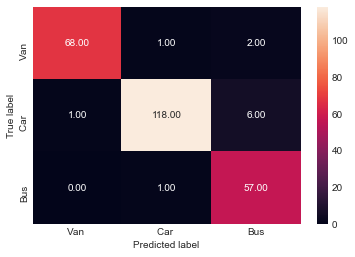

Confusion Matrix For : 
 For Reduced Dimensions Using PCA  [[ 68   3   0]
 [  2 118   5]
 [  1   1  56]]


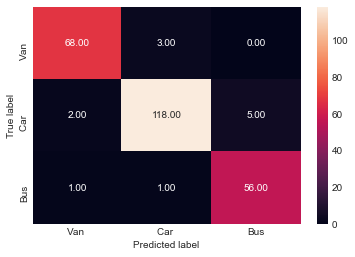

Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        71
         1.0       0.98      0.94      0.96       125
         2.0       0.88      0.98      0.93        58

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.96      0.96      0.96       254

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        71
         1.0       0.97      0.94      0.96       125
         2.0       0.92      0.97      0.94        58

    accuracy                           0.95       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.95      0.95      0.95       254



In [46]:
def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1,2] )
    print("Confusion Matrix For :", "\n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

draw_confmatrix(SplitScale_y_test, orig_yhat_predict,"Van ", "Car ", "Bus", "Original Data Set" )

draw_confmatrix(SplitScale_y_test, pca_yhat_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA ")

#Classification Report Of Model built on Raw Data
print("Classification Report For Raw Data:", "\n", classification_report(SplitScale_y_test,orig_yhat_predict))

#Classification Report Of Model built on Principal Components:

print("Classification Report For PCA:","\n", classification_report(SplitScale_y_test,pca_yhat_predict))

## Conclusion:

On training data set we saw that our support vector classifier without performing PCA has an accuracy score of 95 %.

But when we applied the SVC model on PCA componenets(reduced dimensions) our model still performed better with 95 % with only miniscule fall in score.